In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [49]:
sns.set_style('darkgrid')

In [2]:
class linearRegression:

    def __init__(self):
        self.__theta=[0]  #intiailize theta,x,y,cost to zero
        self.__x=[0]      
        self.__y=[0]
        self.__j=[]
        self.__m=1
        self.__n=1
    def featureNormalize(self,x):
         #future normalization
        mu=x.values.mean(axis=0)
        sigma=x.values.std(axis=0)
        X=(x-mu)/sigma
        return [X,mu,sigma]
    
    def gradientDescent(self,learningRate,m):
        #determine the hypothesis vector
        h=self.__x.dot(self.__theta.transpose())
        #simultaneously update the value of theta
        self.__theta-=((h-self.__y).transpose().dot(self.__x))*learningRate/m
        
    def costFunction(self,m):
        #find h(x)
        h=self.__x.dot(self.__theta.transpose())
        #find the cost
        j=np.sum((h-self.__y)**2)/(2*m)
        #add the cost to the cost vector
        self.__j.append(j)
        
    
        
    def fit(self,x,y,iteration,learningRate):
        #find m or number of total observations
        m=y.size
        #find number of features
        n=x.values[0].size
        #initialize theta to zero vector, from qo to qn
        self.__theta=np.zeros((1,n+1))
        #add x0=1 to feature matrice  for convinience
        X=x.values
        self.__x=np.hstack((np.ones((m,1)),X.reshape((m,n))))
        self.__y=y.values.reshape((m,1))
        self.costFunction(m)
        for i in range(iteration):
            #call gradient descent 
            self.gradientDescent(learningRate,m)
            #add cost of each iteration to cost vector
            self.costFunction(m)
           
    def predict(self,x):
        #predict the value of y or target vector
        m=x.shape[0]
        n=x.values[0].size
        x=np.hstack((np.ones((m,1)),x.values.reshape((m,n))))
        h=x.dot(self.__theta.transpose())
        return h.reshape((m))
    def coefficient(self):
        return self.__theta
    
    def cost(self):
        return self.__j    

In [31]:
data=pd.read_csv('ex1data1.txt',names=['Population','profit'])

In [32]:
data.head()

,Population,profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [33]:
x=data['Population']
y=data["profit"]

In [35]:
lm=linearRegression()
lm.fit(x,y,1500,0.01)

In [7]:
lm.coefficient()


array([[-3.63029144,  1.16636235]])

<AxesSubplot:xlabel='Population', ylabel='profit'>

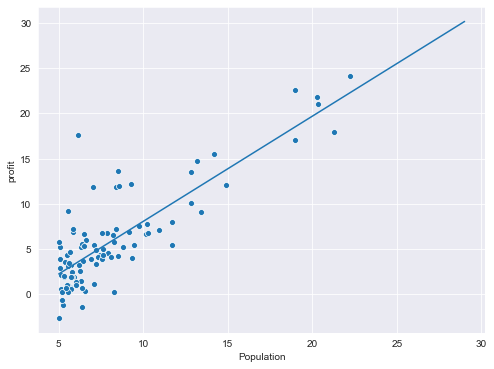

In [50]:
fig=plt.figure(figsize=(8,6))
X=np.array([i for i in range(5,30) ])
m=len(range(5,30))
X=np.hstack((np.ones((m,1)),X.reshape((m,1))))
Y=X.dot(lm.coefficient().transpose()).reshape((m))
sns.scatterplot(x=x,y=y)
sns.lineplot(x=X[:,1],y=list(Y))

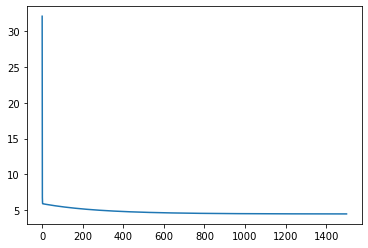

In [8]:
plt.plot(lm.cost())

In [9]:
x=pd.DataFrame({"Population":[3.5,7]},index=[0,1])
x

,Population
0,3.5
1,7.0


In [10]:
lm.predict(x)

array([0.45197679, 4.53424501])

In [11]:
data=pd.read_csv('ex1data2.txt',names=['Area','Bedrooms','Price'])

In [12]:
x=data[["Area","Bedrooms"]]
y=data["Price"]

In [13]:

lm=linearRegression()
x,mu,sigma=lm.featureNormalize(x)
lm.fit(x,y,100,1)

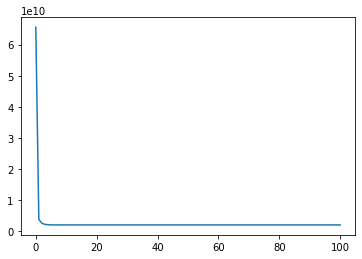

In [14]:
plt.plot(lm.cost())

In [15]:
lm.coefficient()

array([[340412.65957447, 109447.79646964,  -6578.35485416]])

In [16]:
x=pd.DataFrame({"Area":1650,"Bedroom":3},index=[0])
x

,Area,Bedroom
0,1650,3


In [17]:
lm.predict((x-mu)/sigma)

array([293081.4643349])